Task (a) : 
Reading the dataset and creating a dataframe using the read function

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading data into dataframe
signal_training = pd.read_csv('signal_training.txt', sep='        ', engine='python')
background_training = pd.read_csv('background_training.txt', sep='        ' , engine='python')

signal_testing = pd.read_csv('signal_testing.txt', sep='        ', engine='python')
background_testing = pd.read_csv('background_testing.txt', sep='        ' , engine='python')

Creating probability distribution functions using the seaborn library. Somehow I'm unable to obtain proper PDS for the second and third variable. With less data I was able to compute the PDF's but they did not make much sense. When using the entire dataset my code executed very slowly and the graphs did not provide any usefull information. Adjusting the x-lim of said plots also didn't help.

In [56]:
#filterting data if the extreme values are indeed unnecessary
signal_training.drop(signal_training[signal_training['E_T_iso'] > 100].index , inplace=True)
background_training.drop(background_training[background_training['E_T_iso'] > 100].index , inplace=True)

signal_training.drop(signal_training[signal_training['S_t_flight'] > 20].index , inplace=True)
background_training.drop(background_training[background_training['S_t_flight'] > 20].index , inplace=True)

print(signal_training.shape ,background_training.shape)

(1919774, 4) (1918601, 4)


<Axes: xlabel='N_iso_trk', ylabel='Density'>

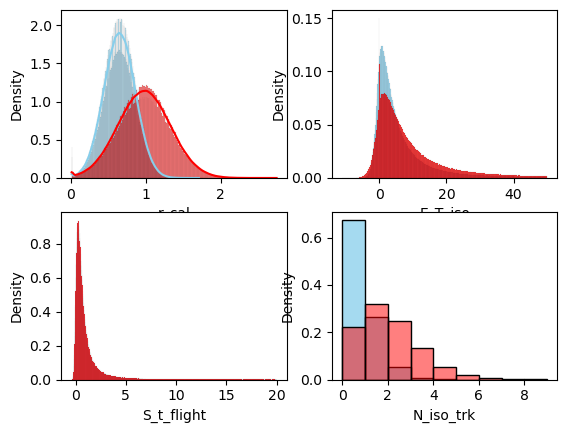

In [57]:
fig, axs = plt.subplots(ncols=2, nrows=2)

sns.histplot(signal_training['r_cal'], kde=True, stat="density", color="skyblue", label="Signal", ax=axs[0, 0])
sns.histplot(background_training['r_cal'], kde=True, stat="density", color="red", label="Background", ax=axs[0, 0])

sns.histplot(signal_training['E_T_iso'].loc[signal_training['E_T_iso'] < 50], stat="density", color="skyblue", label="Signal", ax=axs[0, 1])
sns.histplot(background_training['E_T_iso'].loc[background_training['E_T_iso'] < 50], stat="density", color="red", label="Background", ax=axs[0, 1])

sns.histplot(background_training['S_t_flight'].loc[background_training['S_t_flight'] < 20], stat="density", color="skyblue", label="Signal", ax=axs[1, 0])
sns.histplot(background_training['S_t_flight'].loc[background_training['S_t_flight'] < 20], stat="density", color="red", label="Background", ax=axs[1, 0])

sns.histplot(signal_training['N_iso_trk'], stat="density", color="skyblue", label="Signal", ax=axs[1, 1], bins=range(10))
sns.histplot(background_training['N_iso_trk'], stat="density", color="red", label="Background", ax=axs[1, 1], bins=range(10), alpha=0.5)

Task (b) :
Calculating the Coefficient matrix using pandas

In [58]:
print("Signal Coefficient Matrix : \n", signal_training.corr(), "\n")
print("Background Coefficient Matrix : \n", background_training.corr())

Signal Coefficient Matrix : 
                r_cal   E_T_iso  S_t_flight  N_iso_trk
r_cal       1.000000  0.152106   -0.000582   0.108454
E_T_iso     0.152106  1.000000    0.000545   0.016680
S_t_flight -0.000582  0.000545    1.000000   0.000198
N_iso_trk   0.108454  0.016680    0.000198   1.000000 

Background Coefficient Matrix : 
                r_cal   E_T_iso  S_t_flight  N_iso_trk
r_cal       1.000000  0.195111   -0.000939   0.239370
E_T_iso     0.195111  1.000000    0.001535   0.048750
S_t_flight -0.000939  0.001535    1.000000  -0.000887
N_iso_trk   0.239370  0.048750   -0.000887   1.000000


The results show us, that there aren't any significant correlations between the individual variables. However both matrices show a correlation between r_cal and N_iso_trk with a value of .1 in the case f the signal and .23 in the case of the background data. Hence I will only plot this correlation as I assume all others should approach 0 with more and better observations.

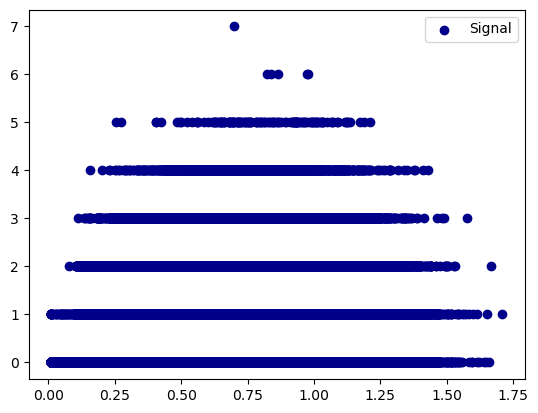

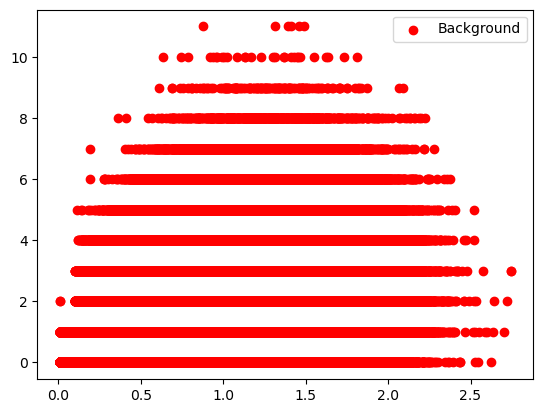

Threshold for 0 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 1 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 2 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.079
Threshold for 3 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.113
Threshold for 4 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.156
Threshold for 5 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.254
Threshold for 6 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.822
Threshold for 7 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.7


Threshold for 0 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 1 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 2 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 3 numbers of tracks in 

In [22]:
plt.scatter(signal_training['r_cal'], signal_training['N_iso_trk'], color='darkblue', label='Signal')
plt.legend()
plt.show()

plt.scatter(background_training['r_cal'], background_training['N_iso_trk'], color='red', label='Background')
plt.legend()
plt.show()

for i in range(8):
    x = signal_training.query("N_iso_trk == @i")
    print(f"Threshold for {i} numbers of tracks in isolation region in Singaldata : r_cal_min = {x['r_cal'].min()}")

print("\n")

for i in range(8):
    x = background_training.query("N_iso_trk == @i")
    print(f"Threshold for {i} numbers of tracks in isolation region in Singaldata : r_cal_min = {x['r_cal'].min()}")

From this we can see, that with a rising value of tracks in isolation regions certains thresholds for r_cal exists. The threshold is in most cases proportional to the number of tracks. With a few small exceptions for very high balues of N_iso_trk. The maxiumum r_cal valu also seems to related to the number of tracks, however it seems to be antiproportional.

Task (c) : calculating the log-likelihoods
In order to do this we need to make assumptions about the different distributions. In the case of r_cal it should be fairly clear that it's a gaussian/normal distribution. As already shown in Problem 3 we can write the log-likelihood of a gaussian distribution as : sum(1->n)((-1/2)*ln(2*p)-(1/2)*ln(sig^2)-(1/2*sig^2)*(y-mu)^2).
We can also just use scipy to simply this task. Now we just need to calculate the values of mu and sigma using MLE. We can simplify this by using the built in pandas methods mean and std.

In [59]:
s_mu = signal_training.mean()
s_sigma = signal_training.std()

b_mu = background_training.mean()
b_sigma = background_training.std()

print(f"Signal values :\n{s_mu}\n{s_sigma} \n\nBackground values :\n{b_mu}\n{b_sigma}")

Signal values :
r_cal         0.648622
E_T_iso       7.416350
S_t_flight    1.948304
N_iso_trk     0.392992
dtype: float64
r_cal          0.209665
E_T_iso       12.430746
S_t_flight     2.648661
N_iso_trk      0.630351
dtype: float64 

Background values :
r_cal          0.976481
E_T_iso       10.853645
S_t_flight     1.122168
N_iso_trk      1.563116
dtype: float64
r_cal          0.348996
E_T_iso       15.267035
S_t_flight     1.927843
N_iso_trk      1.289556
dtype: float64


With this we can assemble our log likelihood for r_cal for both the training and background data. By checking their difference we can determine wheter it is background or signal. Not removing the extreme values from the dataframe results in the standard diviation being to large to perform calculations.

In [60]:
#calculate the values of P(r_cal) for both signal and backgroud and get differnce
import math

def s_llog_rcal(x):
    return math.log(1/(math.sqrt((s_sigma[0]**2)*2*math.pi))*math.exp((-(x-s_mu[0])**2)/(2*(s_sigma[0]**2))))

def b_llog_rcal(x):
    return math.log(1/(math.sqrt((b_sigma[0]**2)*2*math.pi))*math.exp((-(x-b_mu[0])**2)/(2*(b_sigma[0]**2))))

results_signal_signal = signal_testing['r_cal'].apply(s_llog_rcal)
results_background_signal = signal_testing['r_cal'].apply(b_llog_rcal)

results_rcal_signal = results_signal_signal - results_background_signal

results_signal_background = background_testing['r_cal'].apply(s_llog_rcal)
results_background_background = background_testing['r_cal'].apply(b_llog_rcal)

results_rcal_background = results_signal_background - results_background_background

print(f"Signal Data : Sum : {results_rcal_signal.mean()}, Signal : {results_signal_signal.mean()}, Background : {results_background_signal.mean()}")
print(f"Background Data : Sum : {results_rcal_background.mean()}, Signal : {results_signal_background.mean()}, Background : {results_background_background.mean()}")

Signal Data : Sum : 0.6256257368927141, Signal : 0.14252199105506802, Background : -0.48310374583764576
Background Data : Sum : -1.627298599833717, Signal : -1.9935686735420999, Background : -0.36627007370838405


In [64]:
#calculating the loglikelihood for e_t_iso under the assumption that it's exponentially distributed

def s_llog_e_isoT(x):
    return s_sigma[1]*math.exp(-s_sigma[1]*x)

def b_llog_e_isoT(x):
    return b_sigma[1]*math.exp(-b_sigma[1]*x)

results_signal_signal = signal_testing['E_T_iso'].apply(s_llog_e_isoT)
results_background_signal = signal_testing['E_T_iso'].apply(b_llog_e_isoT)

results_e_t_iso_signal = results_signal_signal - results_background_signal

results_signal_background = background_testing['E_T_iso'].apply(s_llog_e_isoT)
results_background_background = background_testing['E_T_iso'].apply(b_llog_e_isoT)

results_e_t_iso_background = results_signal_background - results_background_background

print(f"Signal Data : Sum : {results_e_t_iso_signal.mean()}, Signal : {results_signal_signal.mean()}, Background : {results_background_signal.mean()}")
print(f"Background Data : Sum : {results_e_t_iso_background.mean()}, Signal : {results_signal_background.mean()}, Background : {results_background_background.mean()}")

Signal Data : Sum : -3.091479187023003e+44, Signal : 1.9834700947169787e+35, Background : 3.0914791890064725e+44
Background Data : Sum : -2.351569839365725e+60, Signal : 1.74897956322559e+48, Background : 2.351569839367474e+60


Sadly I do not know whether these values or loglikelihoods are constructed as they should. Furthermore I do not know which distribution to assume for the other PDFs. I also did not participate in a course teaching about neuronal networks. Hence I will not continue my work on the rest of the exercises.